<a href="https://colab.research.google.com/github/SupritiVijay/Stemming-From-Scratch/blob/main/Stemming_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re,copy
import matplotlib.pyplot as plt

In [2]:
def read_file(filename):
  with open(filename,"r") as file:
      data = file.read().replace('\n', ' ').lower() #lowercase
  return data

In [3]:
#Remove Abbreviations
def remove_abbreviations(data):
  data = re.sub(r'(?<!\w)([A-Z])\.', r'\1', data)
  return data

In [4]:
#Tokenization of words
def tokenization(data):
  tokenized_words = re.sub("[^\w\s]", " ", data) 
  word_list = tokenized_words.split()
  
  return word_list

In [5]:
#Remove Stopwords
def remove_stopwords(data):
  with open("stopwords.txt","r") as file:
    stopwords = file.read()
    stopword_list = stopwords.split()

  no_stopwords  = [word for word in data if word.lower() not in stopword_list]
  
  return no_stopwords

In [6]:
vowel = ['a','e','i','o','u']

#Stemming for a single word
def stemming_singleword(word):
  if(len(word)>1):
    if(word.endswith('sses') and len(word) > 4):
      word = word[:-2]

    elif(word.endswith('s') and (word[-2] not in vowel) and len([w for w in word[:-2] if w in vowel])>0):
      word = word[:-1]

    elif(word.endswith('ies') or word.endswith('ied')):
      if(len(word)<5):
        word = word[:-1]
      else:
        word = word[:-2]

    elif(word.endswith('eed') and len([w for w in word[:-3] if w in vowel])>0):
      r = [w for w in word[:-3] if w in vowel][-1]
      red = word[:-3].rfind(r)
      if(word[red+1:-3] not in vowel and len(word[red+1:-3])>0):
        word = word[:-1]

    elif(word.endswith('eedly') and len([w for w in word[:-5] if w in vowel])>0):
      r = [w for w in word[:-5] if w in vowel][-1]
      red = word[:-5].rfind(r)
      if(word[red+1:-5] not in vowel and len(word[red+1:-5])>0):
        word = word[:-3]

    elif(word.endswith('edly') or word.endswith('ed') or word.endswith('ing') or word.endswith('ingly')):
      lastwords= ['edly','ed','ing','ingly']
      remwords = ['at', 'bl', 'iz']
      repeatword = ['ll','ss','zz']
      for i in lastwords:
        if(word.endswith(i)):
          if(len([w for w in word[:-len(i)] if w in vowel])>0):
            remainingword = word[:-len(i)]
            # print(remainingword)
            if(remainingword[-2:] in remwords or len(remainingword)<5):
              word = remainingword + 'e'
            elif(remainingword[-1]==remainingword[-2] and remainingword[-2:] not in repeatword):
              word = remainingword[:-1]

  return word
  
#Stemming for the entire list of data
def stemming(data):
  data = [stemming_singleword(word) for word in data]
  data = [word.replace("_","") for word in data]

  return data

In [7]:
#Count of Vocabulary
def count_vocabulary(data):
  count = 0
  x_array = []
  y_array = []
  vocab = []
  for i in range(len(data)):
    if(data[i] not in vocab):
      vocab.append(data[i])
      count = count + 1
      
    x_array.append(i)
    y_array.append(count)
    
  plt.plot(x_array, y_array, label = "line 2")
  
  # naming the x axis
  plt.xlabel('Words in collection')
  # naming the y axis
  plt.ylabel('Words in vocabulary')
  # giving a title to the graph
  plt.title('Count of Vocabulary')

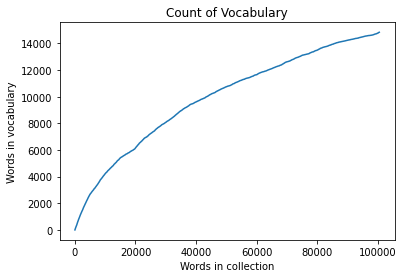

In [8]:
def main(filename):
  data = read_file(filename)
  data = remove_abbreviations(data)
  data = tokenization(data)
  data = remove_stopwords(data)
  data = stemming(data)
  count_vocabulary(data)

main('tokenization-input-part-B.txt')